In this notebook, we'll explore several classification scenarios using SVMs, each illustrating different challenges. We will generate synthetic data and keep the feature space two-dimensional to ease visual analysis. The classifications we will explore include:

1. **Linearly Separable Data**: This is the simplest scenario, where a linear decision boundary can perfectly separate the classes without any errors.
2. **Linear, Non-Separable Data**: Here, we encounter data that cannot be perfectly separated by a linear boundary. We introduce a cost parameter, which imposes a penalty for misclassifications and data points that fall on the margin or within the other side of the boundary. This cost is a critical tuning parameter, allowing us to control the trade-off between decision boundary complexity and the rate of misclassification.
3. **Nonlinear Data**: In this scenario, we apply the kernel trick to demonstrate how SVM can classify data that is inherently non-linear. The kernel trick involves transforming the original data into a higher-dimensional space, where the separation problem can again be treated as linear, simplifying the computation.

**Note**: SVMs have fallen into disuse as some other techniques such as Random forests and XGBoost have proven to outperform them in many different problem setups. However, as mathematician myself I can say they are a "beautiful" item to understand for the so called kernel trick, which connects the classification/regression domain with Functional analysis.

The **core concept** of SVMs is to establish a hyperplane (or more generally, a decision boundary) that effectively separates instances of different classes. However, this is not all that is needed. Note that in the completely separable case, infinetely many different hyperplanes separate the instances of each class. What then? The key is to look for the hyperplane that maximizes the distance from the nearest data points of each class in order to ensure greater confidence in predictions. In the end, this makes it a linear optimization problem.

Where does the name SVM come from? Directly from the problem statement, as the data points that lie closest to the decision boundary directly influence the position and orientation of the hyperplane. These data points are known as support vectors.

In [28]:
import numpy as np
import pandas
import random

import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn.inspection import DecisionBoundaryDisplay

In [29]:
def plot_decision_boundary(classifier, X, y, x_min=-1.5, x_max=1.5, y_min=-1.5, y_max=1.5):
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
    boundary = np.c_[xx.ravel(), yy.ravel()]
    boundary_pred = classifier.predict(boundary)
    Z = boundary_pred

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:,1], c=y)

### 1. Linearly separable data
This is the simplest scenario, where a linear decision boundary can perfectly separate the classes without any errors.

In [30]:
np.random.seed(2)

n = 100

x1_left = np.linspace(-1,-0.1,num=n//2)
x1_right = np.linspace(0.1, 1,num=n//2)
x1 = np.concatenate((x1_left,x1_right))

e = np.random.normal(size=n)/5

x2 = x1+e

y = x1>0

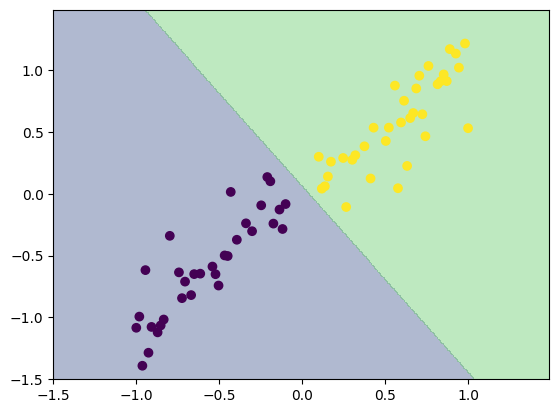

In [31]:
X = np.column_stack((x1, x2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

classifier = svm.SVC(kernel="linear") # soft margin, no cost that penalizes observations within the margin or on the other side of the hyperplane.
classifier.fit(X_train,y_train)

plot_decision_boundary(classifier, X_train, y_train)

### Adding a point that influences the decision boundary

Notice that currently, the decision boundary or margin is nearer to class 0, implying less confidence in predicting those instances. This situation may not be ideal, potentially resulting in poorer performance on unseen data.

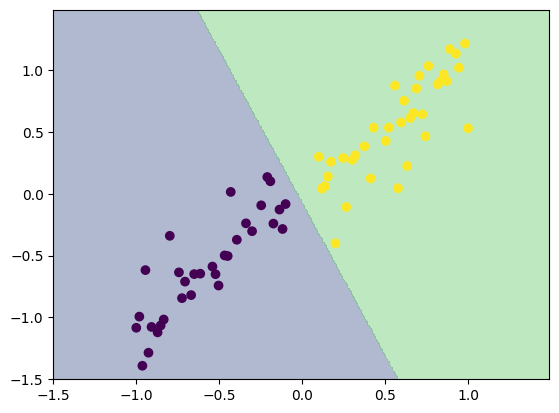

In [32]:
X_train_mod = np.concatenate((X_train, np.array([[0.2,-0.4]])))
y_train_mod = np.concatenate((y_train, np.array([True])))

classifier = svm.SVC(kernel="linear") # keep the cost low
classifier.fit(X_train_mod,y_train_mod)
plt.figure()
plot_decision_boundary(classifier, X_train_mod, y_train_mod)

### Increasing the cost to widen the margin

Sacrificing accuracy on certain training instances to widen the margin for each group could enhance the model's robustness. This adjustment can be made by increasing the cost, but it's not without consequences, as it raises the risk of overfitting.

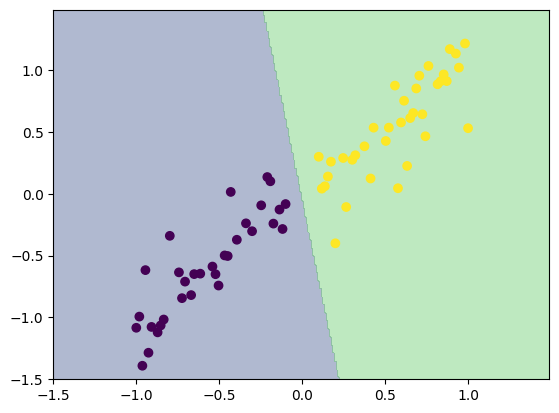

In [33]:
X_train_mod = np.concatenate((X_train, np.array([[0.2,-0.4]])))
y_train_mod = np.concatenate((y_train, np.array([True])))

classifier = svm.SVC(kernel="linear", C=10) #hard margin, high cost that penalizes observations within the margin or on the other side of the hyperplane
classifier.fit(X_train_mod,y_train_mod)
plt.figure()
#plt.scatter(X_test[:, 0], X_test[:, 1], c = preds)
plot_decision_boundary(classifier, X_train_mod, y_train_mod)

### Adding a point that does not influence the decision boundary

This is simply to illustrate the significance of support vectors, that are the data points that reside closest to the decision boundary and significantly influence it. I wanted to include a point distant from the boundary to demonstrate that it has no effect on the decision boundary.

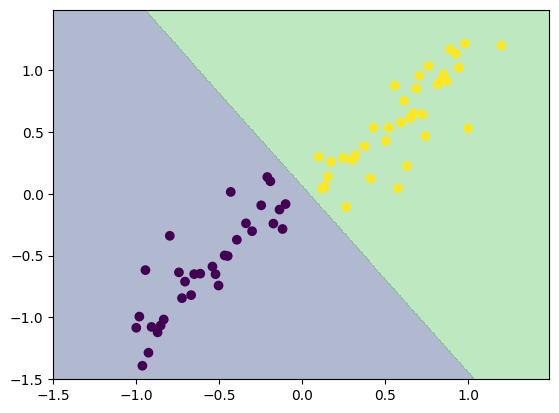

In [34]:
X_train_mod = np.concatenate((X_train, np.array([[1.2,1.2]])))
y_train_mod = np.concatenate((y_train, np.array([True])))

classifier = svm.SVC(kernel="linear")
classifier.fit(X_train_mod,y_train_mod)
plt.figure()
#plt.scatter(X_test[:, 0], X_test[:, 1], c = preds)
plot_decision_boundary(classifier, X_train_mod, y_train_mod)

### 2. Linear, non separable data

Here, we encounter data that cannot be perfectly separated by a linear boundary. We introduce a cost parameter, which imposes a penalty for misclassifications and data points that fall on the margin or within the other side of the boundary. This cost is a critical tuning parameter, allowing us to control the trade-off between decision boundary complexity and the rate of misclassification.

In [35]:
np.random.seed(2)

n = 100

x1_left = np.linspace(-1, 0.2,num=n//2)
x1_right = np.linspace(-0.2, 1,num=n//2)
x1 = np.concatenate((x1_left,x1_right))

e = np.random.normal(size=n)/5

x2 = x1+e

y = [False for element in x1_left] + [True for element in x1_right]

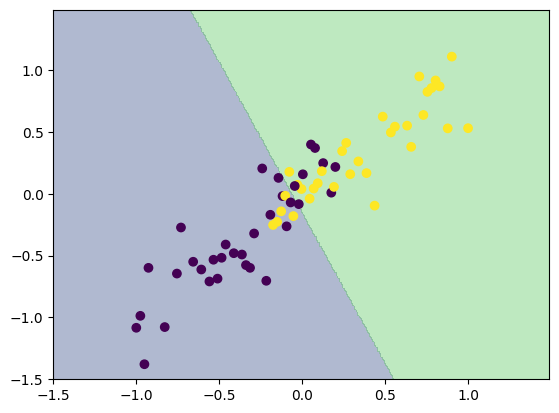

In [36]:
X = np.column_stack((x1, x2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)
classifier = svm.SVC(kernel="linear")
classifier.fit(X_train,y_train)

plot_decision_boundary(classifier, X_train, y_train)

### Increasing the cost
Increasing the cost essentially leads to a reduction of the amount of instances situated within the margin and on the other side of the boundary. This may lead to an overfitting scenario where the model decreases its performance on unseen data.

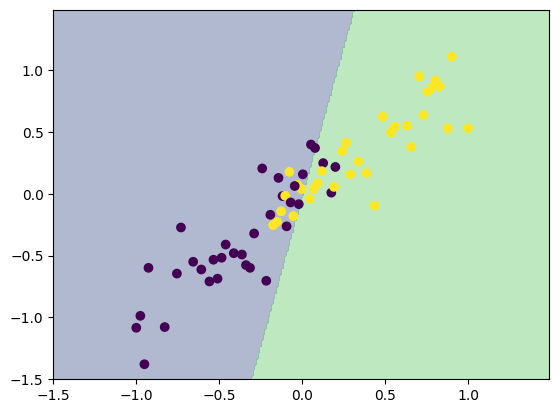

In [37]:
X = np.column_stack((x1, x2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

classifier = svm.SVC(kernel="linear", C=100)
classifier.fit(X_train,y_train)

plot_decision_boundary(classifier, X_train, y_train)

### 3. Non linear, non separable data

In this scenario, we apply the kernel trick to demonstrate how SVM can classify data that is inherently non-linear. The kernel trick involves transforming the original data into a higher-dimensional space, where the separation problem can again be treated as linear, simplifying the computation.

In [38]:
np.random.seed(2)

n= 500

x1 = np.linspace(-1,1,num=500)
e = np.random.normal(size=500)/10
x2 = x1**2+x1**3-x1**4+e

y = (x1>0) & (x1<0.75) & (x2<0.2) | (x1<-0.5)

In [39]:
X = np.column_stack((x1, x2))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

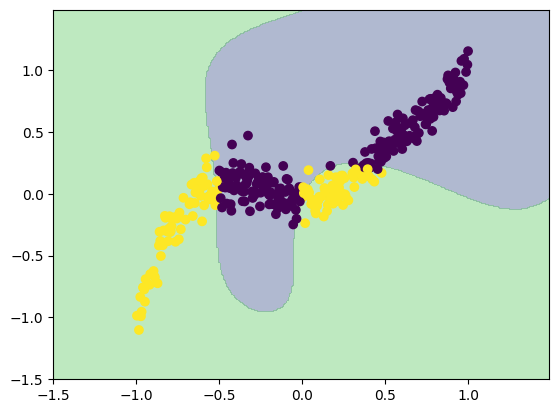

In [41]:
classifier = svm.SVC(kernel="rbf") #radial basis function
classifier.fit(X_train,y_train)
plot_decision_boundary(classifier, X_train, y_train)

### Increasing the cost
Let's intentionally force the SVM to overfit.

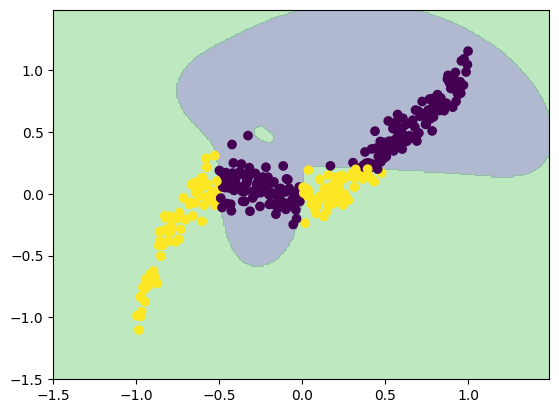

In [42]:
classifier = svm.SVC(kernel="rbf", C = 1000000)
classifier.fit(X_train,y_train)
plot_decision_boundary(classifier, X_train, y_train)

## Conclusion
As we explored different data patterns, the introduction of a cost parameter outlines the subtle balance between boundary complexity and misclassification rates. While increasing the cost can refine the boundary, it also raises the odds of overfitting. This highlights the need of careful consideration and further examination when tuning the cost.